# 2. Análisis de los datos

**Alumno:** José Luis Aguilera Luzania

## Contenido
---

**Introducción**
- ¿Qué es la detección de noticias falsas? (*Fake news*).
- Objetivo de la libreta.

**Análisis de los datos**
- Librería.
- Datos adicionales para la librería `nltk`.
- Cargar los datos.
- Información de los datos.
- Comprobar los tipos.
- Comprobar si faltan valores.
- Cantidad de noticias según la categoría.
- Cantidad de noticias según el tema.
- Cantidad de noticias según el tema y la categoría.
- ¿Cuáles son las fuentes?

**Word Cloud**
- ¿Qué es?
- Palabras vacías o *stopwords* en español.
- Función para generar *word clouds*
- *Word cloud* de todas las noticias.
- *Word cloud* de todas las noticias sobre entretenimiento.
- *Word cloud* de todas las noticias sobre salud.

## Introducción
---

#### ¿Qué es el análisis de los datos?

El análisis de los datos se utiliza para garantizar que los resultados producidos son válidos y aplicables a los objetivos deseados. Permite el identificar errores obvios, así como comprender mejor los datos y detectar valores atípicos.

#### Objetivo de la libreta

El objetivo de esta libreta es conocer mejor los datos, no solo su estructura, también su comportamiento y características para decidir que puede ser útil al momento de resolver el problema de clasificar las noticias.

## Análisis de los datos
---

#### Librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unidecode
import re
import cmd
import nltk


from matplotlib.colors import LinearSegmentedColormap
from wordcloud import WordCloud
from nltk.corpus import stopwords

#### Datos adicionales para la librería `nltk`

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JoseLuisAL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JoseLuisAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Cargar los datos

In [3]:
corpus = pd.read_csv('Datos/corpus_spanish_v3.csv', index_col=0)

#### Información del conjunto de datos

In [4]:
print(f'News, Columns: {corpus.shape}')
print('True News: {}'.format(corpus.groupby('Category').size()[0]))
print('Fake News: {}'.format(corpus.groupby('Category').size()[1]))
print(f'Columns Name: {list(corpus.columns)}')

corpus.head()

News, Columns: (3974, 6)
True News: 1928
Fake News: 2046
Columns Name: ['Category', 'Topic', 'Source', 'Headline', 'Text', 'Link']


,Category,Topic,Source,Headline,Text,Link
0,True,Science,El país,La NASA recupera el contacto con un satélite d...,La NASA recupera el contacto con un satélite d...,https://elpais.com/elpais/2018/02/01/ciencia/1...
1,True,Economy,El financiero,AMLO aceleraría el consumo y el crecimiento ec...,AMLO aceleraría el consumo y el crecimiento ec...,http://www.elfinanciero.com.mx/economia/amlo-a...
2,Fake,Sport,actualidadpanamericana.com,Compañero de James se ‘calvea’ y le juega pesa...,Al borde de un colapso nervioso quedó el hábil...,http://www.actualidadpanamericana.com/companer...
3,Fake,Politics,actualidadpanamericana.com,Dian gravará este año a los niños que recojan ...,"Mediante pupitrazo de último minuto anoche, el...",http://www.actualidadpanamericana.com/dian-gra...
4,Fake,Politics,actualidadpanamericana.com,Uribe asegura que insultó 358 guerrilleros,Muy temprano esta mañana el expresidente y aho...,http://www.actualidadpanamericana.com/uribe-as...


#### Comprobar los tipos

In [5]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 0 to 3973
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  3974 non-null   object
 1   Topic     3974 non-null   object
 2   Source    3974 non-null   object
 3   Headline  3974 non-null   object
 4   Text      3974 non-null   object
 5   Link      3974 non-null   object
dtypes: object(6)
memory usage: 217.3+ KB


#### Comprobar si faltan valores

In [6]:
corpus.isnull().sum()

Category    0
Topic       0
Source      0
Headline    0
Text        0
Link        0
dtype: int64

#### Cantidad de noticias según la categoría

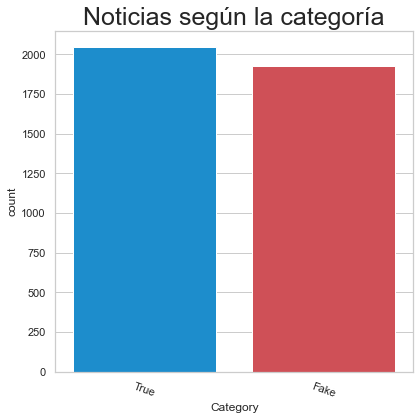

In [7]:
# Colores.
color_verdaderas = '#0095e9'
color_falsas = '#e43b44'

# Plot.
plt.figure(figsize=(6,6))
sns.set(style='whitegrid')
ax = sns.countplot(x = 'Category', data=corpus, palette=[color_verdaderas, color_falsas])
plt.title('Noticias según la categoría', fontsize = 25)
plt.xticks(rotation = -20)

# Guardar el plot.
plt.tight_layout()
plt.savefig('Imagenes/analisis/plt_news_count.png')

#### Cantidad de noticias según el tema

El conjunto de datos cuenta con 9 temas.

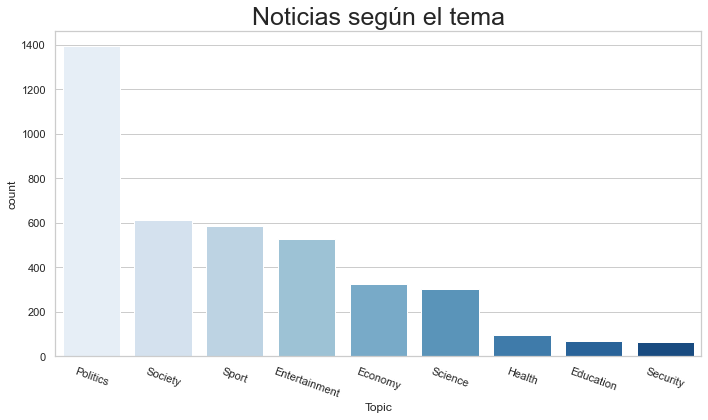

In [8]:
# Colores
color_verdaderas = '#0095e9'
color_falsas = '#e43b44'

# Plot.
topics_order = corpus['Topic'].value_counts().index

plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
ax = sns.countplot(x='Topic', order=topics_order, data=corpus, palette='Blues')
plt.xticks(rotation = -20)
plt.title('Noticias según el tema', fontsize = 25)

#Guardar el plot.
plt.tight_layout()
plt.savefig('Imagenes/analisis/plt_news_topic.png')


In [9]:
corpus['Topic'].value_counts()

Politics         1394
Society           614
Sport             584
Entertainment     528
Economy           323
Science           302
Health             97
Education          67
Security           65
Name: Topic, dtype: int64

#### Cantidad de noticias según el tema y la categoría

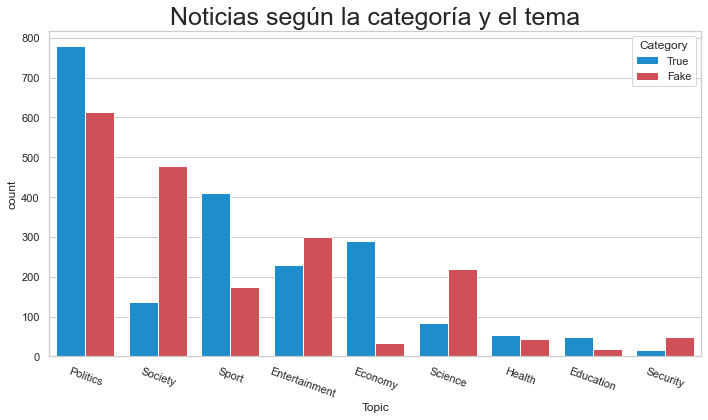

In [10]:
# Plot.
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
ax = sns.countplot(x = 'Topic', order=topics_order, hue='Category', data=corpus, palette=[color_verdaderas, color_falsas])
plt.title('Noticias según la categoría y el tema', fontsize = 25)
plt.xticks(rotation = -20)

#Guardar el plot.
plt.tight_layout()
plt.savefig('Imagenes/analisis/plt_category_topic.png')


#### Fuentes de información

El número de fuentes es 182, pero no
Para intentar obtener las fuentes se realizan estos pasos:
1. Obtener todos los valores de la columna *fuente*.
2. Eliminar todas las fuentes repetidas.
3. Imprimir las fuentes.

In [11]:
def process_source(source_text):
    processed_text = source_text
    processed_text = processed_text.lower()
    processed_text = re.sub(r'(https?://)?(www\.)?(wiki\.)?(in\.)?(www2\.)?(news\.)?', "", processed_text)
    processed_text = re.sub(r'(\.blogspot\.com)|(.com)|(\.org)|(\.es)|(\.fo)', "", processed_text)
    processed_text = re.sub(r'http', "", processed_text)
    processed_text = re.sub(r'@\S+', "", processed_text)
    processed_text = re.sub(r'\n', "", processed_text)
    processed_text = re.sub(r'/', "", processed_text)
    processed_text = re.sub(r'^[ \t]+|[ \t]+$', "", processed_text)
    processed_text = re.sub(r"(?<!\n)\n(?!\n)", " ", processed_text)
    processed_text = re.sub(r'[ -]+', " ", processed_text)
    processed_text = re.sub(r' +', " ", processed_text)
    processed_text = processed_text.replace(r"*PHONE*", "número")
    processed_text = processed_text.replace(r"*EMAIL*", "email")
    processed_text = processed_text.replace(r"*URL*", "url")
    processed_text = unidecode.unidecode(processed_text)

    return processed_text

In [12]:
# 1.
sources = corpus['Source'].apply(process_source)
sources_ls = sources.to_list()

# 2.
sources_ls = list(sorted(set(sources_ls)))

# 3.
cli = cmd.Cmd()
cli.columnize(sources_ls, displaywidth=110)

20 minutos              el coleccionista de datos  hispantv              nippon                   voz del sur
abc                     el dizque                  hola                  noticieros televisa      yahoo      
abc el recreo           el economista              hola mexico           novedades quitana roo  
abc noticias            el espectador              huffingtonpost        nytimes                
abc sociedad            el financiero              huffpost              opinion                
actualidad rt           el grafico                 inciclopedia          pan tweet              
actualidadpanamericana  el heraldo                 info bae              parabolica             
alerta digital          el librero de gutenberg    jornada               people en espanol      
animal politico         el manana                  konbini               playgroundmag          
anonymous azteca        el manana global           la jornada            proceso                
argu

## Word Cloud
---

#### ¿Qué es?

*Word Cloud* es una representación visual de las palabras que forman un texto, donde el tamaño es mayor para las palabras que aparecen con más frecuencia.

#### Palabras vacías o *stopwords* en español

Las *stopwords* o palabras vacías son aquellas que carecen de sentido de manera individual o sin una palabra clave o *keyword*. Algunos ejemplos son: el, la, ellos, ustedes, para, ser, etc.

Se utilizan las *stopwords* proporcionadas por la librería `nltk` en conjunto con las obtenidas del repositorio "stopwords-es" del usuario [genediazjr](https://github.com/stopwords-iso/stopwords-es)

In [13]:
# Obtener las stopwords.
stopwords_spanish_nltk = stopwords.words('spanish')
stopwords_spanish_json = list(pd.read_json('Datos/stopwords-es.json')[0])

# Se concatenan las stopwords, se crea un set para eliminar repetidos y sé genera una lista.
stopwords_spanish = list(set(stopwords_spanish_nltk+stopwords_spanish_json))

#### Función para generar *word clouds*

In [14]:
def generate_word_cloud(source_text, filename, colors):

    # Colores.
    color_map = LinearSegmentedColormap.from_list("mycmap", colors)

    # Generar el WordCloud.
    wordcloud = WordCloud(width=900, height=300, stopwords = stopwords_spanish, background_color = "white", colormap = color_map).generate(source_text)

    # Plot.
    plt.figure()
    plt.figure(figsize=(15,15))
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud, interpolation='bilinear')

    # Guardar el Plot.
    plt.tight_layout()
    path = 'Plots/Word-Cloud/' + filename
    plt.savefig(path)

In [15]:
colors_all_news = ["#5a6988", "#3a4466"]
colors_true_news = ["#0095e9", "#124e89"]
colors_fake_news = ["#e43b44", "#9e2835"]

#### Word Cloud de todas las noticias

<Figure size 432x288 with 0 Axes>

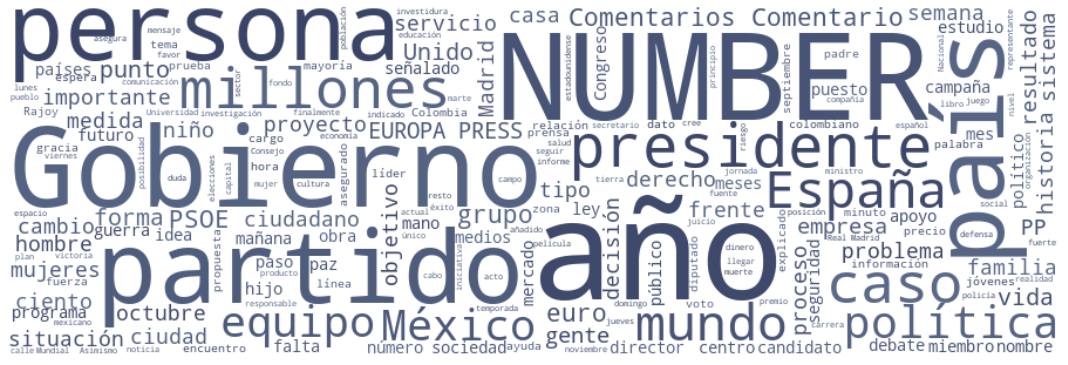

In [16]:
text = " ".join(text for text in corpus.Text)
generate_word_cloud(source_text=text, filename='wc_news_all.png', colors=colors_all_news)

#### Word Cloud de todas las noticias sobre entretenimiento

<Figure size 432x288 with 0 Axes>

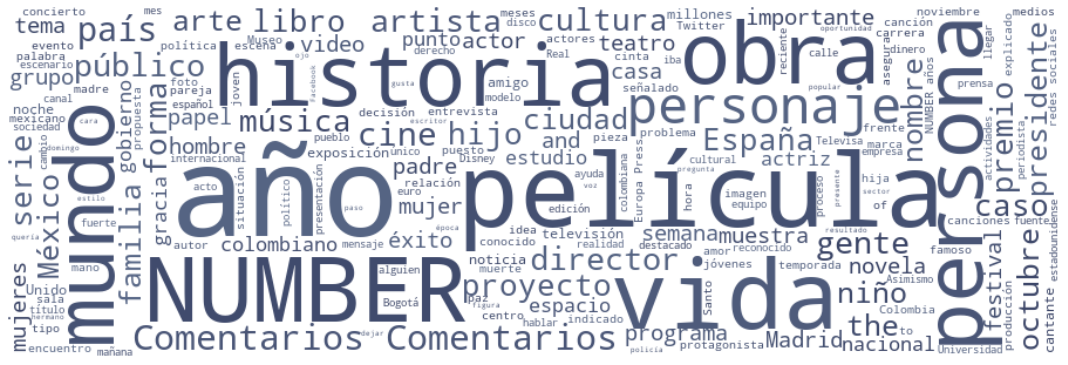

In [17]:
df = corpus[corpus['Topic'] == 'Entertainment']
text = " ".join(text for text in df.Text)
generate_word_cloud(source_text=text, filename='wc_news_entertainment_all.png', colors=colors_all_news)

#### Word Cloud de todas las *true news* sobre entretenimiento

<Figure size 432x288 with 0 Axes>

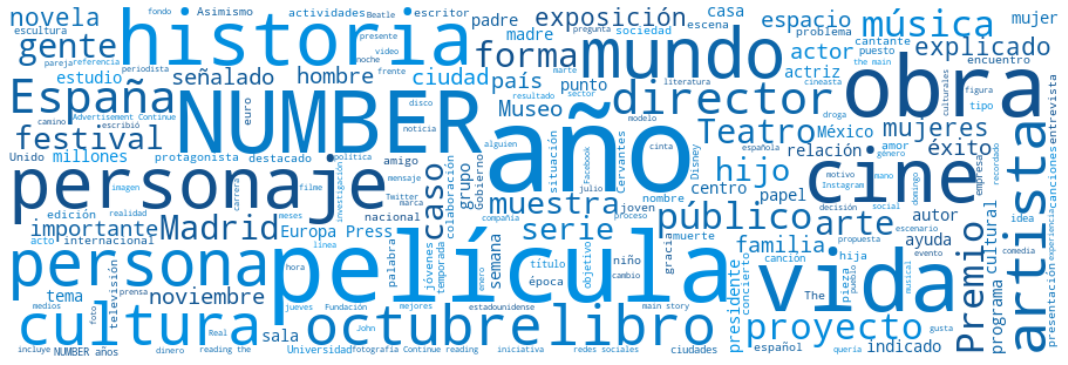

In [18]:
df = corpus[corpus['Topic'] == 'Entertainment']
df = df[df['Category'] == 'True']

text = " ".join(text for text in df.Text)
generate_word_cloud(source_text=text, filename='wc_news_entertainment_true.png', colors=colors_true_news)

#### Word Cloud de todas las *fake news* sobre entretenimiento

<Figure size 432x288 with 0 Axes>

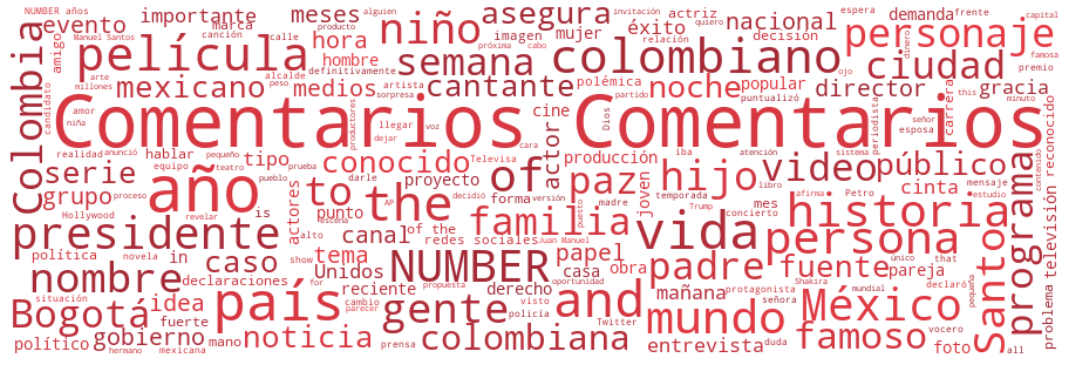

In [19]:
df = corpus[corpus['Topic'] == 'Entertainment']
df = df[df['Category'] == 'Fake']

text = " ".join(text for text in df.Text)
generate_word_cloud(source_text=text, filename='wc_news_entertainment_fake.png', colors=colors_fake_news)

#### Word Cloud de todas las noticias sobre salud

<Figure size 432x288 with 0 Axes>

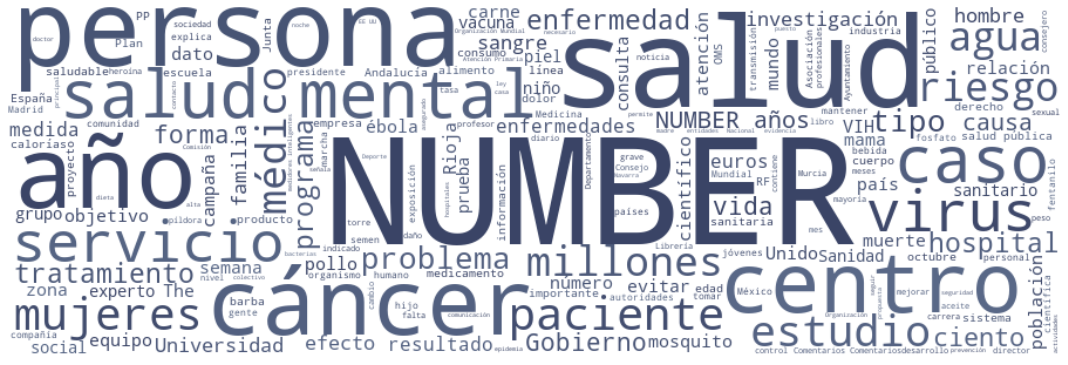

In [20]:
df = corpus[corpus['Topic'] == 'Health']
text = " ".join(text for text in df.Text)
generate_word_cloud(source_text=text, filename='wc_news_health_all.png', colors=colors_all_news)

#### Word Cloud de todas *true news* sobre salud

<Figure size 432x288 with 0 Axes>

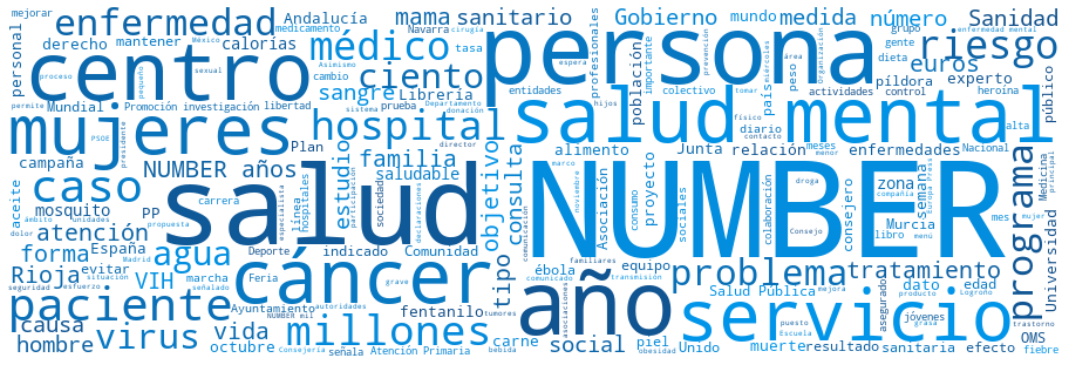

In [21]:
df = corpus[corpus['Topic'] == 'Health']
df = df[df['Category'] == 'True']

text = " ".join(text for text in df.Text)
generate_word_cloud(source_text=text, filename='wc_news_health_true.png', colors=colors_true_news)

#### Word Cloud de todas *true news* sobre salud

<Figure size 432x288 with 0 Axes>

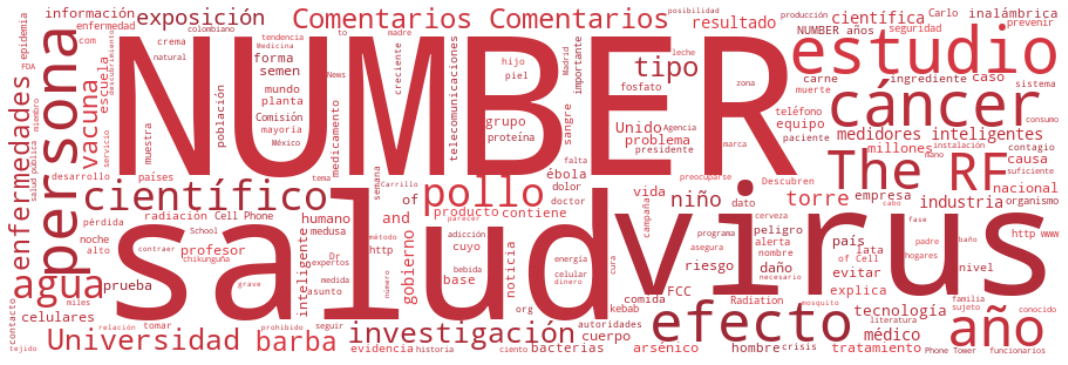

In [22]:
df = corpus[corpus['Topic'] == 'Health']
df = df[df['Category'] == 'Fake']

text = " ".join(text for text in df.Text)
generate_word_cloud(source_text=text, filename='wc_news_health_fake.png', colors=colors_fake_news)